# 互评作业1: 数据探索性分析与数据预处理
> [github 仓库地址](https://github.com/ezeli/DataMining_BIT)

## 一、Wine Reviews 数据集
### 1、数据说明
选择第一版数据集（winemag-data_first150k），包含10个属性，150k行数据。

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/wine-reviews/winemag-data_first150k.csv', index_col=0)
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

属性类别数: 10
总行数: 150930
示例数据:


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### 2、数据摘要

In [3]:
num_fields = data.select_dtypes(include=np.number).columns.values
nom_fields = data.select_dtypes(exclude=np.number).columns.values
print('标称属性:', nom_fields)
print('数值属性:', num_fields)

标称属性: ['country' 'description' 'designation' 'province' 'region_1' 'region_2'
 'variety' 'winery']
数值属性: ['points' 'price']


#### 1）标称属性
以“country”属性为例，进行频数统计，其余标称属性类似。

In [4]:
field = 'country'
print('频数统计:')
data[field].value_counts()

频数统计:


US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

#### 2）数值属性

In [5]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


**5数概括**

points：80、86、88、90、100  
price；4、16、24、40、2300

**缺失值个数统计**

In [6]:
print('points:',data['points'].isnull().sum())
print('price:',data['price'].isnull().sum())

points: 0
price: 13695


### 3、数据可视化

#### 1）标称属性
同样以“country”属性为例，绘制直方图检查数据分布，其余标称属性类似。

聚会太多导致显示效果不好，所以取前15个聚会为例（其余聚会的频数都小于200）:


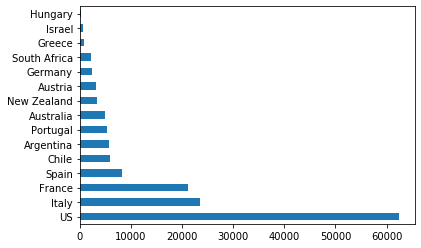

In [7]:
field = 'country'
print('聚会太多导致显示效果不好，所以取前15个聚会为例（其余聚会的频数都小于200）:')
data[field].value_counts().head(15).plot.barh()

#### 2）数值属性
绘制直方图和Q-Q图检查数据分布，并绘制盒图检查离群点。

**直方图和Q-Q图**

points 直方图和Q-Q图:


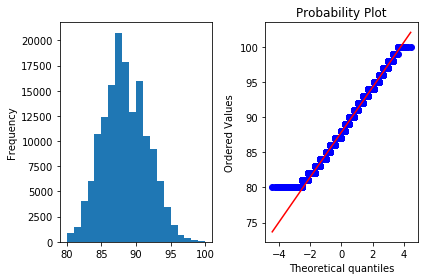

price 直方图和Q-Q图:


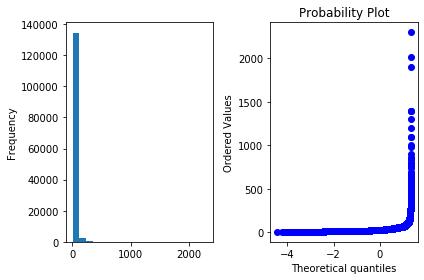

In [8]:
for field in num_fields:
    print(field, '直方图和Q-Q图:')
    plt.subplot(1, 2, 1)
    data[field].plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(data[field], plot=plt)
    plt.tight_layout()  # 调整整体空白
    plt.show()

通过直方图和Q-Q图可以看出“points”属性符合正太分布，而“price”属性不符合。

**盒图**

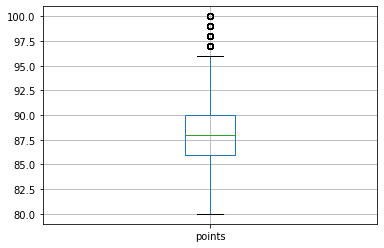

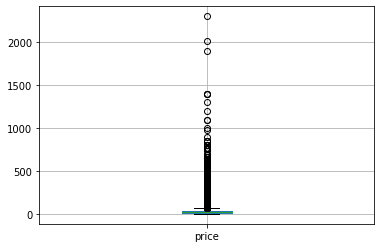

In [9]:
for field in num_fields:
    data.boxplot(field)
    plt.show()

### 4、数据缺失处理
首先对缺失数据进行统计。

In [10]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data != 0]
missing_data

country            5
designation    45735
price          13695
province           5
region_1       25060
region_2       89977
dtype: int64

#### 1）将缺失部分剔除
将包含缺失值的整行直接删除。

In [11]:
print('原始数据行数:', len(data))
drop_data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))

原始数据行数: 150930
将缺失部分剔除后数据行数: 39241


以 price 属性为例，通过盒图对比新旧数据:


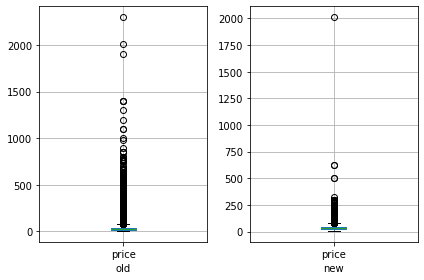

In [12]:
print('以 price 属性为例，通过盒图对比新旧数据:')
field = 'price'
plt.subplot(1, 2, 1)
data.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
drop_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

In [13]:
drop_data.isna().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

#### 2）用最高频率值来填补缺失值

以 price 属性为例，通过盒图对比新旧数据:
price 属性的最高频率值为: 20.0


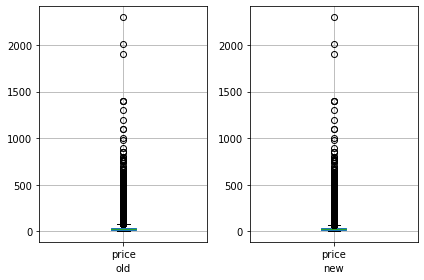

In [14]:
print('以 price 属性为例，通过盒图对比新旧数据:')
field = 'price'
mode = data[field].mode()[0]
new_data = data.fillna({field: mode})
print(field, '属性的最高频率值为:', mode)

plt.subplot(1, 2, 1)
data.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

In [15]:
data[data[field].isna()][field].head(5)

32    NaN
56    NaN
72    NaN
82    NaN
116   NaN
Name: price, dtype: float64

In [16]:
new_data[data[field].isna()][field].head(5)

32     20.0
56     20.0
72     20.0
82     20.0
116    20.0
Name: price, dtype: float64

可以看出新数据中 price 属性的缺失值已经被填充。

#### 3）通过属性的相关关系来填补缺失值

In [17]:
data.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


可以看出“price”和“points”属性之间存在正相关关系，因此可以建立线性回归模型通过“points”值预测缺失的“price”值。

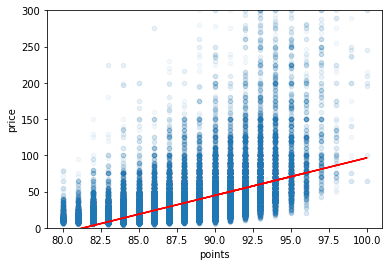

In [18]:
drop_data = data.dropna(subset=['price'])
x = drop_data['points']
y = drop_data['price']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
drop_data.plot(kind="scatter", x="points", y="price", alpha=0.05)
plt.plot(x, model.predict(x), 'r-')
plt.ylim(0,300)
plt.show()

In [19]:
new_data = data.copy()
for index, row in new_data[data['price'].isna()].iterrows():
    new_data['price'][index] = model.predict(np.array(row['points']).reshape(-1, 1))

In [20]:
data[data['price'].isna()].head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,NaN,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,NaN,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita


In [21]:
new_data[data['price'].isna()].head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,44.600434,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,France,"Delicious while also young and textured, this ...",Le Pavé,90,44.600434,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,49.785122,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida
82,Italy,"Berry, baking spice, dried iris, mint and a hi...",Palliano Riserva,91,49.785122,Piedmont,Roero,NaN,Nebbiolo,Ceste
116,Spain,Aromas of brandied cherry and crème de cassis ...,Dulce Tinto,86,23.861683,Levante,Jumilla,NaN,Monastrell,Casa de la Ermita


可以看出新数据中缺失的“price”值已经通过“points”值预测填充。

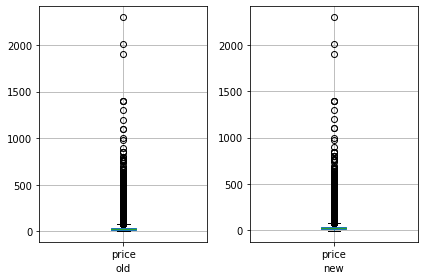

In [22]:
plt.subplot(1, 2, 1)
data.boxplot('price')
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot('price')
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

#### 4）通过数据对象之间的相似性来填补缺失值
以填充“price”为例，使用相同“variety”的数据对象的“price”均值来填充缺失数据，如果没有相同的“variety”，则接下来依次考虑相同的“winery”、“designation”、“region_1”、“province”。

In [23]:
full_data = data[data['price'].notna()]
new_data = data.copy()
consider_fields = ['variety', 'winery', 'designation', 'region_1', 'province']
for i, row in tqdm.tqdm(list(new_data[data['price'].isna()].iterrows())):
    for field in consider_fields:
        tmp_data = full_data[full_data[field]==row[field]]
        if len(tmp_data) > 0:
            new_data['price'][i] = tmp_data['price'].mean()
            break

100%|██████████| 13695/13695 [06:13<00:00, 36.70it/s]


In [24]:
data[data['price'].isna()].head(5)['price']

32    NaN
56    NaN
72    NaN
82    NaN
116   NaN
Name: price, dtype: float64

In [25]:
new_data[data['price'].isna()].head(5)['price']

32     36.216047
56     18.615296
72     66.406802
82     66.406802
116    17.459459
Name: price, dtype: float64

可以看出新数据中缺失的“price”值已经通过相似对象的“price”属性的均值进行填充。

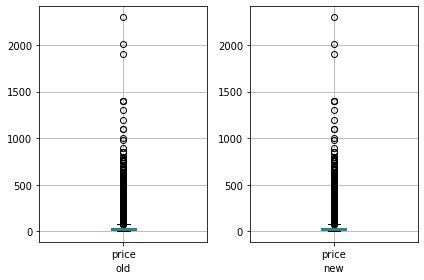

In [26]:
plt.subplot(1, 2, 1)
data.boxplot('price')
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot('price')
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

## 二、Consumer & Visitor Insights For Neighborhoods 数据集
### 1、数据说明
包含13个属性，220735行数据。

In [27]:
data = pd.read_csv('./data/visit-patterns-by-census-block-group/cbg_patterns.csv')
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

属性类别数: 13
总行数: 220735
示例数据:


,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


### 2、数据摘要

In [28]:
num_fields = data.select_dtypes(include=np.number).columns.values
nom_fields = data.select_dtypes(exclude=np.number).columns.values
print('标称属性:', nom_fields)
print('数值属性:', num_fields)

标称属性: ['visitor_home_cbgs' 'visitor_work_cbgs' 'related_same_day_brand'
 'related_same_month_brand' 'top_brands' 'popularity_by_hour'
 'popularity_by_day']
数值属性: ['census_block_group' 'date_range_start' 'date_range_end'
 'raw_visit_count' 'raw_visitor_count' 'distance_from_home']


#### 1）标称属性
以“top_brands”属性为例，进行频数统计，其余标称属性类似。

In [29]:
field = 'top_brands'
print('频数统计:')
data[field].value_counts()

频数统计:


[]                                                                                                                                                                                                         74540
["United States Postal Service (USPS)"]                                                                                                                                                                     5352
["Aflac (American Family Life Assurance)"]                                                                                                                                                                  1517
["Dollar General"]                                                                                                                                                                                          1308
["National Association for the Education of Young Children (NAEYC)"]                                                                                                

#### 2）数值属性

In [30]:
data.describe()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
count,2.207340e+05,2.207350e+05,2.207350e+05,2.206290e+05,2.206290e+05,2.205180e+05
mean,2.870864e+11,1.538352e+09,1.541030e+09,4.793066e+04,1.182032e+04,3.511280e+04
std,1.640723e+11,0.000000e+00,0.000000e+00,6.252655e+04,3.045832e+04,9.973193e+04
min,1.001020e+10,1.538352e+09,1.541030e+09,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.312101e+11,1.538352e+09,1.541030e+09,1.704200e+04,3.430000e+03,8.584000e+03
50%,2.901900e+11,1.538352e+09,1.541030e+09,3.064000e+04,6.541000e+03,1.461400e+04
75%,4.200349e+11,1.538352e+09,1.541030e+09,5.667800e+04,1.309900e+04,3.139775e+04
max,7.803099e+11,1.538352e+09,1.541030e+09,7.179900e+06,6.113949e+06,6.297845e+06


**5数概括**

每个数值属性的5数概括为上表的后五个数字。

**缺失值个数统计**

In [31]:
for field in num_fields:
    print(field+':',data[field].isnull().sum())

census_block_group: 1
date_range_start: 0
date_range_end: 0
raw_visit_count: 106
raw_visitor_count: 106
distance_from_home: 217


### 3、数据可视化

#### 1）标称属性
同样以“top_brands”属性为例，绘制直方图检查数据分布，其余标称属性类似。

聚会太多导致显示效果不好，所以取前15个聚会为例:


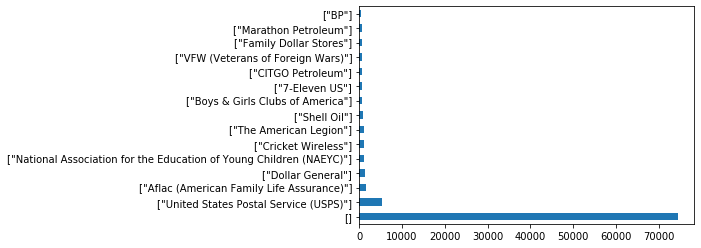

In [32]:
field = 'top_brands'
print('聚会太多导致显示效果不好，所以取前15个聚会为例:')
data[field].value_counts().head(15).plot.barh()

#### 2）数值属性
绘制直方图和Q-Q图检查数据分布，并绘制盒图检查离群点。

**直方图和Q-Q图**

census_block_group 直方图和Q-Q图:


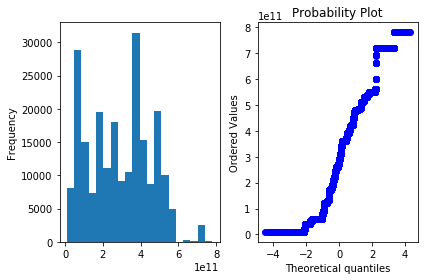

date_range_start 直方图和Q-Q图:


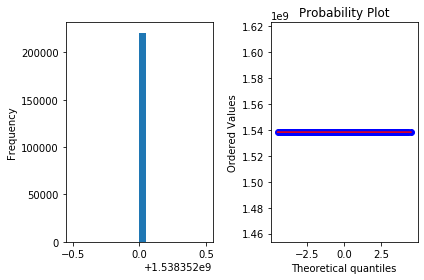

date_range_end 直方图和Q-Q图:


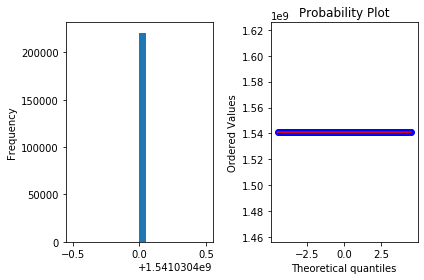

raw_visit_count 直方图和Q-Q图:


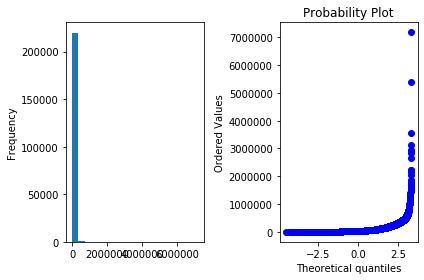

raw_visitor_count 直方图和Q-Q图:


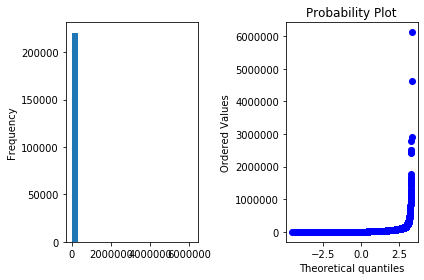

distance_from_home 直方图和Q-Q图:


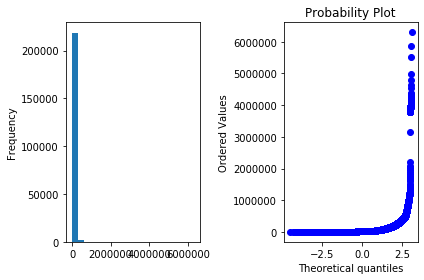

In [33]:
for field in num_fields:
    print(field, '直方图和Q-Q图:')
    plt.subplot(1, 2, 1)
    data[field].plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(data[field], plot=plt)
    plt.tight_layout()  # 调整整体空白
    plt.show()

通过直方图和Q-Q图可以看出这些标称属性都不符合正太分布。

**盒图**

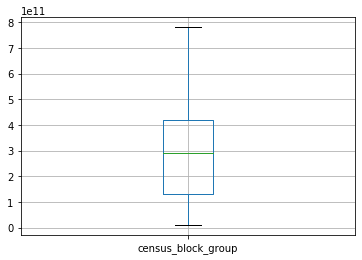

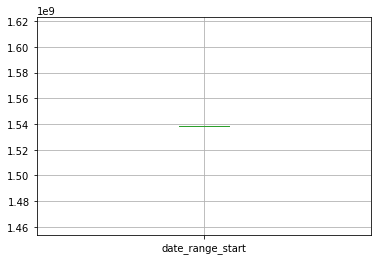

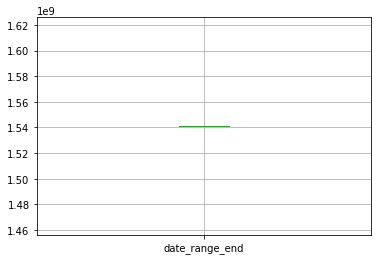

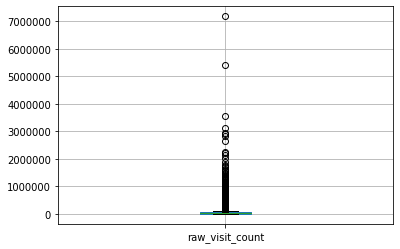

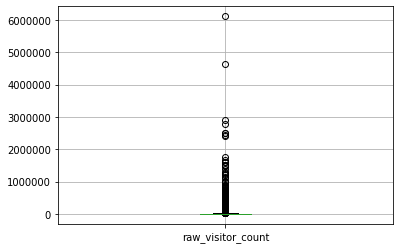

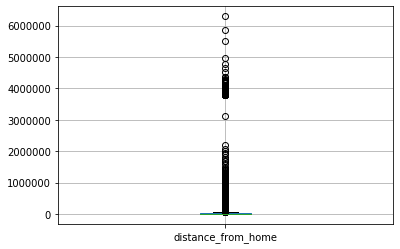

In [34]:
for field in num_fields:
    data.boxplot(field)
    plt.show()

### 4、数据缺失处理
首先对缺失数据进行统计。

In [35]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data != 0]
missing_data

census_block_group      1
raw_visit_count       106
raw_visitor_count     106
distance_from_home    217
dtype: int64

#### 1）将缺失部分剔除
将包含缺失值的整行直接删除。

In [36]:
print('原始数据行数:', len(data))
drop_data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))

原始数据行数: 220735
将缺失部分剔除后数据行数: 220518


以 distance_from_home 属性为例，通过盒图对比新旧数据:


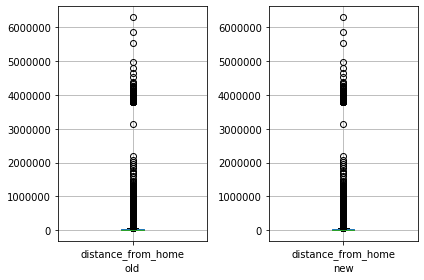

In [37]:
print('以 distance_from_home 属性为例，通过盒图对比新旧数据:')
field = 'distance_from_home'
plt.subplot(1, 2, 1)
data.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
drop_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

In [38]:
drop_data.isna().sum()

census_block_group          0
date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64

#### 2）用最高频率值来填补缺失值

以 distance_from_home 属性为例，通过盒图对比新旧数据:
distance_from_home 属性的最高频率值为: 8345.0


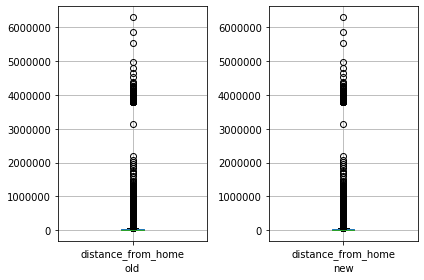

In [39]:
print('以 distance_from_home 属性为例，通过盒图对比新旧数据:')
field = 'distance_from_home'
mode = data[field].mode()[0]
new_data = data.fillna({field: mode})
print(field, '属性的最高频率值为:', mode)

plt.subplot(1, 2, 1)
data.boxplot(field)
plt.xlabel('old')
plt.subplot(1, 2, 2)
new_data.boxplot(field)
plt.xlabel('new')
plt.tight_layout()  # 调整整体空白
plt.show()

In [40]:
data[data[field].isna()][field].head(5)

1939   NaN
2838   NaN
3128   NaN
3986   NaN
4372   NaN
Name: distance_from_home, dtype: float64

In [41]:
new_data[data[field].isna()][field].head(5)

1939    8345.0
2838    8345.0
3128    8345.0
3986    8345.0
4372    8345.0
Name: distance_from_home, dtype: float64

可以看出新数据中 distance_from_home 属性的缺失值已经被填充。

#### 3）通过属性的相关关系来填补缺失值

In [42]:
data.corr()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
census_block_group,1.000000,NaN,NaN,-0.053986,-0.032591,-0.000658
date_range_start,NaN,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN,NaN
raw_visit_count,-0.053986,NaN,NaN,1.000000,0.815850,0.021721
raw_visitor_count,-0.032591,NaN,NaN,0.815850,1.000000,0.032879
distance_from_home,-0.000658,NaN,NaN,0.021721,0.032879,1.000000


In [43]:
len(data[data['raw_visit_count'].isna() & data['raw_visitor_count'].isna()]) == len(data[data['raw_visit_count'].isna()])

True

可以看出只有“raw_visit_count”和“raw_visitor_count”两个属性之间存在较强的正相关关系，但是这两个属性都是同时缺失，因此没办法互相填补。结论：这个数据集没办法通过属性的相关关系来填补缺失值。

#### 4）通过数据对象之间的相似性来填补缺失值
通过行之间的相似性来填充缺失值。

In [44]:
data[data['raw_visit_count']==14009.0].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
41085,2.906795e+11,1538352000,1541030400,14009.0,3647.0,"{""290679502003"":61}","{""290679505002"":65}",43498.0,"[""walmart"",""CoxHealth"",""SUBWAY"",""mcdonalds"",""C...","[""Casey's General Stores"",""walmart"",""Kum & Go""...",[],"[1911,1947,1812,1728,1668,1678,1867,1951,1599,...","{""Monday"":1936,""Tuesday"":2268,""Wednesday"":1936..."
100941,4.820302e+11,1538352000,1541030400,14009.0,4018.0,"{""482030201031"":81,""482030205021"":71,""48203020...","{""482030205014"":119}",46266.0,"[""Exxon Mobil"",""Whataburger"",""mcdonalds"",""Soni...","[""walmart"",""Exxon Mobil"",""Whataburger"",""mcdona...","[""Jeep"",""Chrysler"",""Dodge""]","[837,810,804,820,799,835,866,1118,1060,1057,10...","{""Monday"":2034,""Tuesday"":2144,""Wednesday"":2136..."
109606,1.500301e+11,1538352000,1541030400,14009.0,1633.0,"{""150030068042"":90,""150030068043"":73,""15003006...","{""150030074001"":53}",5232.0,"[""Target"",""Navy Exchange"",""starbucks""]","[""mcdonalds"",""Target"",""starbucks"",""Navy Exchan...",[],"[1224,1165,1140,1173,1178,1292,1403,1767,1274,...","{""Monday"":2245,""Tuesday"":2177,""Wednesday"":2144..."
148395,6.037604e+10,1538352000,1541030400,14009.0,4807.0,{},"{""060379800131"":104,""060376212012"":95}",5889.0,"[""starbucks""]","[""starbucks"",""mcdonalds"",""Costco Wholesale Cor...","[""Aflac (American Family Life Assurance)""]","[1036,982,956,937,957,1121,1267,1537,1673,1168...","{""Monday"":2159,""Tuesday"":2205,""Wednesday"":2134..."


In [45]:
data[data['raw_visitor_count']==3039.0].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
19283,1.701901e+11,1538352000,1541030400,10684.0,3039.0,"{""170190107003"":114,""170190057021"":74,""1701901...","{""170190014001"":89,""170190059002"":80,""17019000...",10180.0,"[""Meijer"",""mcdonalds"",""Walgreens""]","[""walmart"",""Walgreens"",""mcdonalds"",""Meijer"",""C...",[],"[533,495,480,465,456,496,658,1199,1119,944,842...","{""Monday"":1748,""Tuesday"":1683,""Wednesday"":1795..."
20214,1.500301e+11,1538352000,1541030400,13016.0,3039.0,"{""150030089083"":95,""150030089091"":90,""15003008...","{""150030089072"":94}",6006.0,"[""Costco Wholesale Corp."",""mcdonalds"",""walmart...","[""mcdonalds"",""walmart"",""Costco Wholesale Corp....",[],"[783,764,756,753,822,902,1007,1300,842,850,922...","{""Monday"":2207,""Tuesday"":2234,""Wednesday"":1897..."
24277,3.606100e+11,1538352000,1541030400,7072.0,3039.0,{},{},11748.0,"[""SUBWAY"",""Retro Fitness"",""Flywheel"",""Chipotle...","[""starbucks"",""Dunkin' Donuts"",""SUBWAY"",""Au Bon...",[],"[276,261,233,248,208,205,231,493,939,1190,1303...","{""Monday"":955,""Tuesday"":1049,""Wednesday"":1063,..."
30327,3.909305e+11,1538352000,1541030400,24175.0,3039.0,"{""390930503004"":110,""390930503003"":103,""390930...","{""390930132001"":62}",7674.0,"[""Dodge"",""Chrysler"",""Jeep"",""Giant Eagle"",""BP"",...","[""mcdonalds"",""Giant Eagle"",""walmart"",""Target"",...","[""VFW (Veterans of Foreign Wars)""]","[1033,1005,960,975,966,1055,1581,5030,3786,355...","{""Monday"":3984,""Tuesday"":4328,""Wednesday"":4313..."


In [46]:
data[data['distance_from_home']==10180.0].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
19283,1.701901e+11,1538352000,1541030400,10684.0,3039.0,"{""170190107003"":114,""170190057021"":74,""1701901...","{""170190014001"":89,""170190059002"":80,""17019000...",10180.0,"[""Meijer"",""mcdonalds"",""Walgreens""]","[""walmart"",""Walgreens"",""mcdonalds"",""Meijer"",""C...",[],"[533,495,480,465,456,496,658,1199,1119,944,842...","{""Monday"":1748,""Tuesday"":1683,""Wednesday"":1795..."
81102,4.843911e+11,1538352000,1541030400,138764.0,21381.0,"{""484391136101"":422,""484391136104"":214,""484391...","{""484391136321"":295,""484391139111"":212,""484391...",10180.0,[],"[""walmart"",""starbucks"",""Chick-fil-A"",""QuikTrip...","[""walmart"",""starbucks"",""Sonic"",""Jersey Mike's""...","[3321,3059,2984,3021,3275,3825,6205,13166,1281...","{""Monday"":22035,""Tuesday"":23107,""Wednesday"":22..."
82935,4.019005e+10,1538352000,1541030400,48173.0,7718.0,"{""040190046381"":296,""040190044291"":172,""040190...","{""040190046441"":162,""040190046341"":105,""040190...",10180.0,"[""Omni Hotels & Resorts"",""Circle K Stores"",""st...","[""Circle K Stores"",""walmart"",""starbucks"",""mcdo...","[""Circle K Stores"",""Goodwill Industries"",""Afla...","[3507,3435,3386,3366,3449,3771,4194,6599,5032,...","{""Monday"":7810,""Tuesday"":7984,""Wednesday"":7782..."
98199,2.609923e+11,1538352000,1541030400,33350.0,8386.0,"{""260992238002"":153,""260992239003"":90,""2609923...","{""260999823001"":166,""260999820001"":142,""260992...",10180.0,[],"[""mcdonalds"",""Meijer"",""Kroger"",""Tim Hortons"",""...",[],"[1047,1004,971,1037,1097,1223,3439,6495,5353,5...","{""Monday"":5798,""Tuesday"":5810,""Wednesday"":5704..."
106444,1.704384e+11,1538352000,1541030400,22992.0,4543.0,"{""170438427022"":58}","{""170438427101"":266}",10180.0,"[""starbucks"",""Chick-fil-A"",""Auto Wares"",""Einst...","[""starbucks"",""Walgreens"",""mcdonalds"",""Jewel-Os...","[""Auto Wares""]","[1561,1498,1525,1484,1512,1553,1791,2757,2629,...","{""Monday"":4114,""Tuesday"":4149,""Wednesday"":4207..."


In [47]:
data[data['date_range_start']==1538352000].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


In [48]:
data[data['visitor_work_cbgs']=='{"010479567021":52}'].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
18594,1.047957e+10,1538352000,1541030400,32416.0,7803.0,"{""010479561002"":78,""010479561004"":68,""01047956...","{""010479567021"":52}",134244.0,"[""Chevron"",""Pilot Travel Centers""]","[""walmart"",""Dollar General"",""mcdonalds"",""SUBWA...","[""Chevron"",""Dollar General"",""Helena Chemical"",...","[1432,1298,1339,1312,1448,1687,2023,3318,2780,...","{""Monday"":5133,""Tuesday"":5060,""Wednesday"":4953..."


In [49]:
data[data['related_same_day_brand']=='["Dollar General"]'].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
232,3.719396e+11,1538352000,1541030400,13908.0,3573.0,"{""371939602003"":52,""371939601001"":50}",{},59506.0,"[""Dollar General""]","[""walmart"",""mcdonalds"",""Dollar General"",""Bojan...","[""Dollar General"",""United States Postal Servic...","[1090,1078,1064,1127,1156,1290,1375,1543,1178,...","{""Monday"":1927,""Tuesday"":1961,""Wednesday"":1874..."
2733,3.915592e+11,1538352000,1541030400,31528.0,5798.0,"{""391559209002"":67,""391559209001"":63,""39155920...","{""391559338004"":63,""391559334001"":56}",11302.0,"[""Dollar General""]","[""Dollar General"",""Giant Eagle"",""walmart"",""mcd...","[""The Huntington National Bank""]","[1267,1246,1173,1255,1251,1410,1658,2040,2125,...","{""Monday"":5143,""Tuesday"":5299,""Wednesday"":5210..."
3138,4.013109e+10,1538352000,1541030400,74459.0,33059.0,"{""040131072011"":423,""040131074006"":76,""0401310...","{""040131072011"":249,""040131141001"":78,""0401311...",14845.0,"[""Dollar General""]","[""Circle K Stores"",""QuikTrip"",""Fry's Food & Dr...","[""Dollar General"",""Quest Diagnostics""]","[5056,4704,4356,4389,4973,5301,5974,6913,6923,...","{""Monday"":11152,""Tuesday"":11166,""Wednesday"":11..."
3392,4.508302e+11,1538352000,1541030400,28218.0,3869.0,"{""450830227003"":107,""450830230011"":87,""4508302...","{""450830229002"":99}",15174.0,"[""Dollar General""]","[""QuikTrip"",""Dollar General"",""Spinx"",""walmart""...",[],"[4196,4120,4127,4129,4110,4132,4386,5147,3680,...","{""Monday"":4472,""Tuesday"":4347,""Wednesday"":4442..."


In [50]:
data[data['top_brands']=='["Dollar General"]'].head(5)

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
15,4.019004e+10,1538352000,1541030400,56602.0,17743.0,"{""040190041071"":284,""040190040621"":277,""040190...","{""040190041211"":231,""040190040621"":200,""040190...",37198.0,"[""Circle K Stores"",""Pilot Travel Centers"",""She...","[""walmart"",""Circle K Stores"",""mcdonalds"",""Shel...","[""Dollar General""]","[1779,1725,1588,1584,1781,2611,3320,4305,3828,...","{""Monday"":8614,""Tuesday"":8972,""Wednesday"":8751..."
164,2.914147e+11,1538352000,1541030400,17798.0,3921.0,"{""291414701003"":83,""291319627002"":53,""29141470...",{},66147.0,"[""walmart"",""Dollar General""]","[""walmart"",""mcdonalds"",""Casey's General Stores...","[""Dollar General""]","[1771,1776,1783,1790,1783,1862,2030,2311,1935,...","{""Monday"":2293,""Tuesday"":2180,""Wednesday"":2252..."
191,3.602901e+11,1538352000,1541030400,9590.0,2908.0,{},"{""360290165001"":56}",7722.0,"[""Tim Hortons"",""Dollar General"",""Wegmans Food ...","[""Tim Hortons"",""Wegmans Food Markets"",""Tops Fr...","[""Dollar General""]","[522,480,510,482,532,538,716,885,716,722,794,7...","{""Monday"":1548,""Tuesday"":1607,""Wednesday"":1487..."
972,1.103006e+10,1538352000,1541030400,64573.0,8857.0,"{""010890028021"":150,""010950303002"":147,""011030...","{""010890111001"":239,""010950305005"":112,""010890...",30937.0,"[""Chick-fil-A"",""walmart""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chick...","[""Dollar General""]","[2164,2016,2018,2013,2240,3079,5024,5536,4173,...","{""Monday"":9906,""Tuesday"":10140,""Wednesday"":976..."


通过上述分析可以看出在其他属性值相同的情况下，有缺失的属性值的变动很大，说明这些缺失值无法通过其他行来进行填补。